In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
kgs.set_float32(False)


local
local
stop final relax at some point


In [2]:
%load_ext pyinstrument

stop final relax at some point
0.3
[[JiggleRandomTree(comment='', max_xy_move=0.05, max_theta_move=0.5235987755982988), 'JiggleTreeSmall', 1.0], [JiggleRandomTree(comment='', max_xy_move=0.1, max_theta_move=3.141592653589793), 'JiggleTreeBig', 1.0]]
Generation 0, Trees 2, Best cost: 0.00794730, Est: 0.39736507, h: 0.628952
[[0.62895224]]


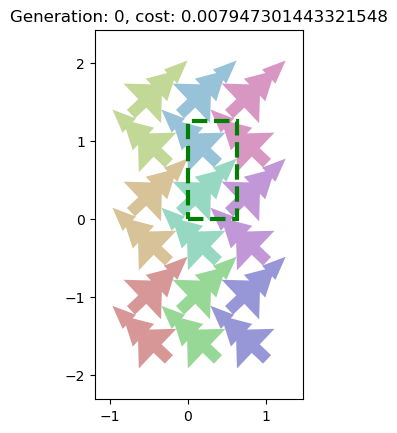

In [ ]:
importlib.reload(pack_ga)
fastMode = False
runner = pack_ga.GA()

# fast for now
#runner.population_size = 1
#runner.selection_size = [0]
#runner.n_generations = 500

# structural
ratios = np.arange(0.3,1.01,0.1)
res = []
for r in ratios:
    print(r)
    runner.N_trees_to_do = np.array([2])
    runner.population_size = 1000
    runner.plot_fitness_predictors = False
    runner.plot_diversity_matrix = False
    runner.plot_champions = True
    runner.initializer.base_solution = kgs.SolutionCollectionLatticeFixed()
    runner.initializer.base_solution.aspect_ratios = cp.array([2.0], dtype=kgs.dtype_cp)
    runner.initializer.jiggler.duration_init = 0.
    runner.initializer.jiggler.duration_compact /= 100000
    runner.initializer.jiggler.duration_final = 0.
    runner.initializer.jiggler.plot_interval = None
    runner.initializer.jiggler.n_rounds = 1
    runner.rough_relaxers[0].plot_interval =None
    runner.rough_relaxers[0].n_iterations//=5
    runner.fine_relaxers[0].plot_interval=None
    runner.rough_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].cost.costs.pop(1)
    runner.fine_relaxers[0].n_iterations//=5
    runner.n_generations = 5
    runner.fitness_cost.costs.pop(1)
    kgs.debugging_mode = 1
    kgs.profiling=False
    new_moves = []
    for i in [1,2]:
        new_moves.append(runner.move.moves[i])
    runner.move.moves = new_moves
    #print(runner.move.moves)
    #runner.rough_relaxers = []
    #runner.fine_relaxers = []
    runner.run()
    res.append(runner)

In [ ]:
runner.rough_relaxers[0].cost

CostCompound(comment='', scaling=1.0, costs=[AreaCost(comment='', scaling=0.01), CollisionCostOverlappingArea(comment='', scaling=1.0)])